<a href="https://colab.research.google.com/github/christophersingh/Airtime/blob/main/Regression_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from pandas import DataFrame,Series
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
import missingno as msno # plotting missing data
import seaborn as sns # plotting library
from sklearn import svm

In [92]:
df = pd.read_csv('https://raw.githubusercontent.com/MGCodesandStats/datasets/master/cars.csv')
df

,age,gender,miles,debt,income,sales
0,28,0,23,0,4099,620
1,26,0,27,0,2677,1792
2,30,1,58,41576,6215,27754
3,26,1,25,43172,7626,28256
4,20,1,17,6979,8071,4438
...,...,...,...,...,...,...
958,22,0,11,8778,9829,1593
959,19,1,23,4850,3470,4742
960,28,1,28,9312,2720,12771
961,50,0,29,51343,8713,28511


In [93]:
df.isna().sum()
# Drop the rows with missing values
df = df.dropna()

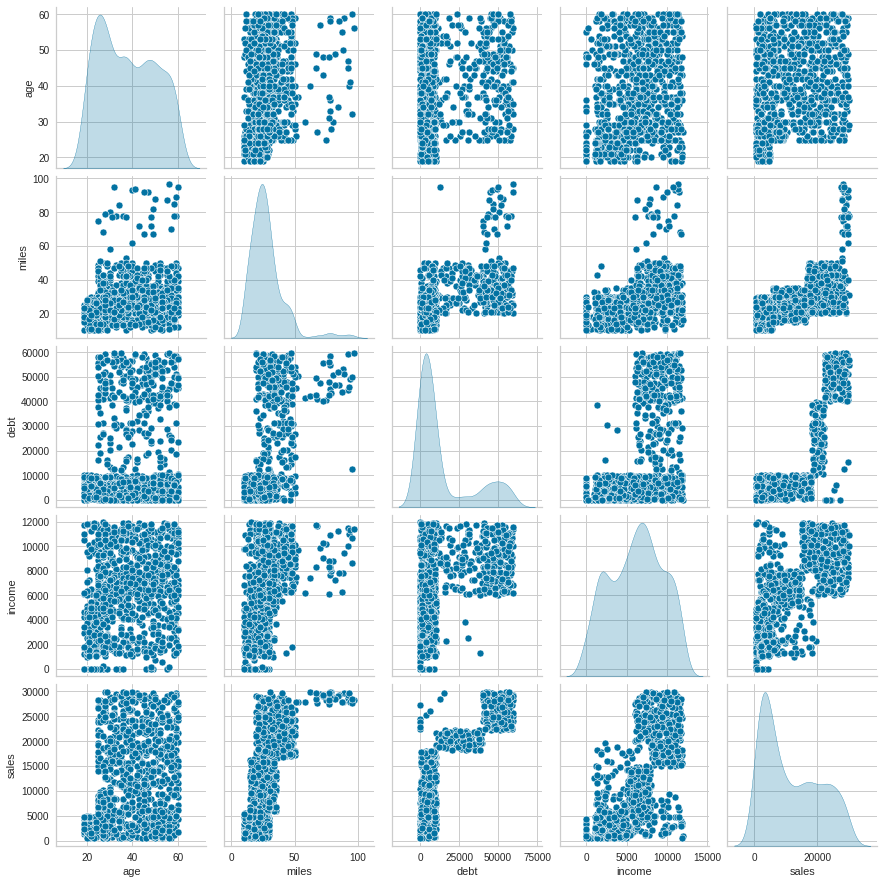

In [94]:
sns.pairplot(df[['age', 'miles', 'debt', 'income', 'sales']], diag_kind="kde")

In [95]:
X = df[['age', 'gender', 'miles', 'debt', 'income']]
Y = df[['sales']]

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=2)

In [97]:
import matplotlib
import matplotlib.pyplot as plt

#libraries for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#libraries for evaluation
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split


#libraries for models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV
from yellowbrick.regressor import AlphaSelection

from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.ensemble import AdaBoostRegressor

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [98]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
Y_train = scaler.fit_transform(Y_train)

In [99]:
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X_train,Y_train)
#Predicting using test set 
Y_pred = dt_regressor.predict(X_test)
mae=metrics.mean_absolute_error(Y_test, Y_pred)
mse=metrics.mean_squared_error(Y_test, Y_pred)
# Printing the metrics
print('Suppport Vector Regression Accuracy: ', dt_regressor.score(X_test,Y_test))
print('R2 square:',metrics.r2_score(Y_test, Y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

Suppport Vector Regression Accuracy:  -1.5008040999585348
R2 square: -1.5008040999585348
MAE:  10883.32792905051
MSE:  197368377.067377


In [100]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)
#Prediction using test set 
y_pred = lin_reg.predict(X_test)
mae=metrics.mean_absolute_error(Y_test, y_pred)
mse=metrics.mean_squared_error(Y_test, y_pred)
# Printing the metrics
print('R2 square:',metrics.r2_score(Y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

R2 square: 0.6258139362388013
MAE:  4075.42164778646
MSE:  29531499.939160515


In [101]:
rf_regressor = RandomForestRegressor(n_estimators = 300 ,  random_state = 0)
rf_regressor.fit(X_train,Y_train)
#Predicting the SalePrices using test set 
y_pred = rf_regressor.predict(X_test)
mae=metrics.mean_absolute_error(Y_test, y_pred)
mse=metrics.mean_squared_error(Y_test, y_pred)
# Printing the metrics
print('Suppport Vector Regression Accuracy: ', rf_regressor.score(X_test,Y_test))
print('R2 square:',metrics.r2_score(Y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

Suppport Vector Regression Accuracy:  -1.5008048055859722
R2 square: -1.5008048055859722
MAE:  10883.341715045786
MSE:  197368432.7568819


In [102]:
from sklearn.svm import SVR
regressor= SVR(kernel='rbf')
regressor.fit(X_train,Y_train)
y_pred_svm=regressor.predict(X_test)
#y_pred_svm = cross_val_predict(regressor, x, y)
mae=metrics.mean_absolute_error(Y_test, y_pred_svm)
mse=metrics.mean_squared_error(Y_test, y_pred_svm)
# Printing the metrics
print('Suppport Vector Regression Accuracy: ', regressor.score(X_test,Y_test))
print('R2 square:',metrics.r2_score(Y_test, y_pred_svm))
print('MAE: ', mae)
print('MSE: ', mse)

Suppport Vector Regression Accuracy:  -1.5009341439838502
R2 square: -1.5009341439838502
MAE:  10883.780318922814
MSE:  197378640.39756918


In [103]:
from sklearn.ensemble import GradientBoostingRegressor
outcome = []
model_names = []
models = [('Linear', LinearRegression()),
          ('Ridge', Ridge()),
          ('Lasso', Lasso()),
          ('Bagging', BaggingRegressor()),
          ('Ada', AdaBoostRegressor()),
          ('SVM', SVR()), 
          ('DecTree', DecisionTreeRegressor()),
          ('KNN', KNeighborsRegressor()),
          ('RanForest', RandomForestRegressor()),
          ('XGB', GradientBoostingRegressor())]

In [104]:
from sklearn import model_selection
for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=10, random_state=42)
    results = model_selection.cross_validate(model, X, Y, cv=k_fold_validation, scoring=['r2','neg_mean_squared_error','neg_mean_absolute_error'])
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| R2 Squared=%f MSE=%f MAE=%f" % (model_name, results['test_r2'].mean(), results['test_neg_mean_squared_error'].mean(), results['test_neg_mean_absolute_error'].mean())
    print(output_message)

Linear| R2 Squared=0.820721 MSE=-14237398.359381 MAE=-2894.042062
Ridge| R2 Squared=0.820724 MSE=-14237165.611919 MAE=-2894.022913
Lasso| R2 Squared=0.820741 MSE=-14235809.234103 MAE=-2893.914184
Bagging| R2 Squared=0.884213 MSE=-9062159.334673 MAE=-2008.949653
Ada| R2 Squared=0.856605 MSE=-11268028.029864 MAE=-2622.737119
SVM| R2 Squared=-0.057839 MSE=-85001704.598974 MAE=-7677.288511
DecTree| R2 Squared=0.824354 MSE=-13779129.529306 MAE=-2371.634740
KNN| R2 Squared=0.791267 MSE=-16363316.301507 MAE=-2875.409186
RanForest| R2 Squared=0.893624 MSE=-8309362.149596 MAE=-1943.214362
XGB| R2 Squared=0.900057 MSE=-7822997.468675 MAE=-1943.824603


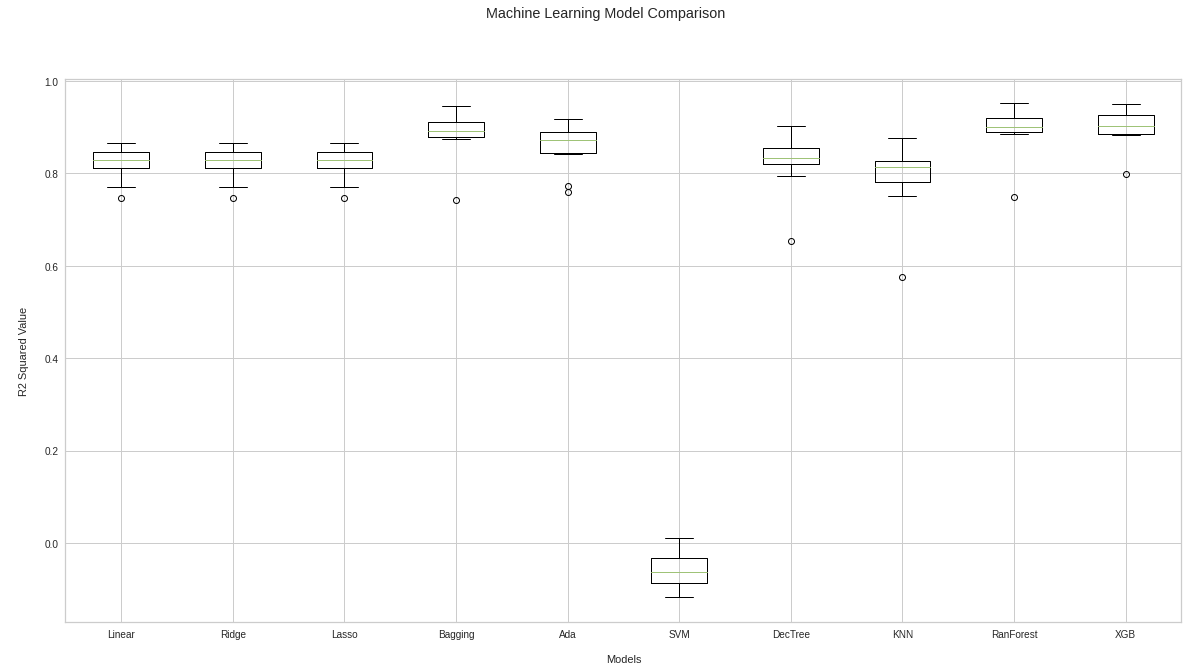

In [105]:
r2, mse, mae = [], [], []
for x in range(0,10):
  r2.append(outcome[x]['test_r2'])
  mse.append(outcome[x]['test_neg_mean_squared_error'])
  mae.append(outcome[x]['test_neg_mean_absolute_error'])
fig = plt.figure()
plt.rcParams["figure.figsize"] = (20,10)
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(r2)
plt.xlabel('\nModels')
plt.ylabel('\nR2 Squared Value\n')
ax.set_xticklabels(model_names)
plt.show()

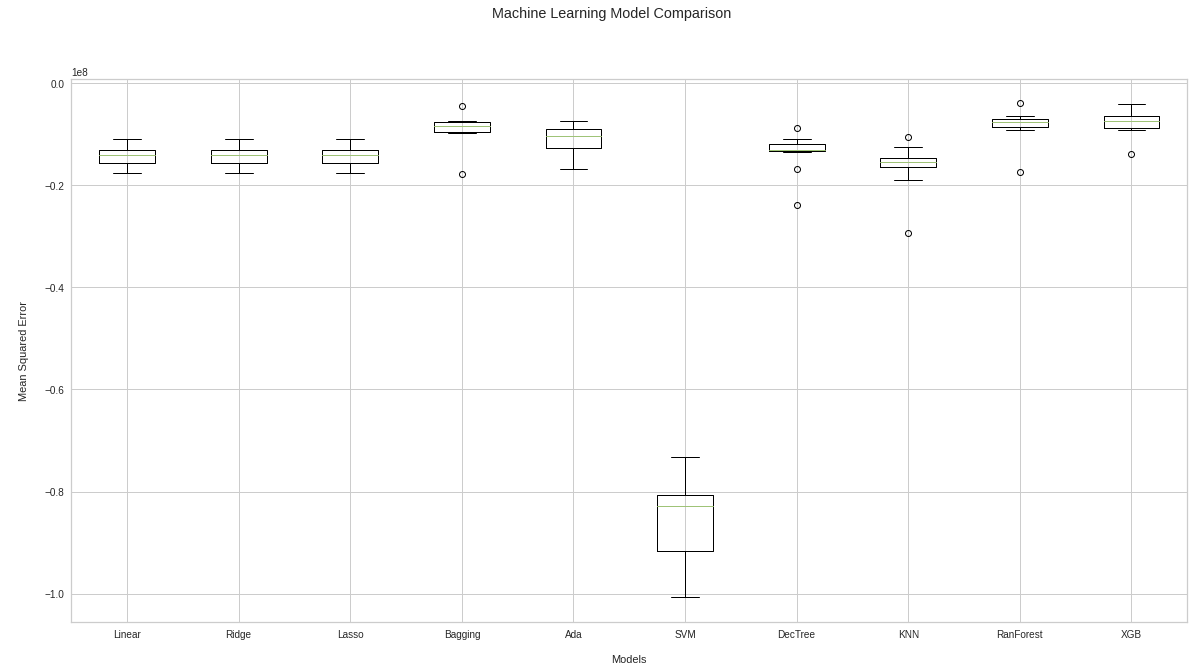

In [106]:
fig = plt.figure()
plt.rcParams["figure.figsize"] = (20,10)
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(mse)
plt.xlabel('\nModels')
plt.ylabel('\nMean Squared Error\n')
ax.set_xticklabels(model_names)
plt.show()

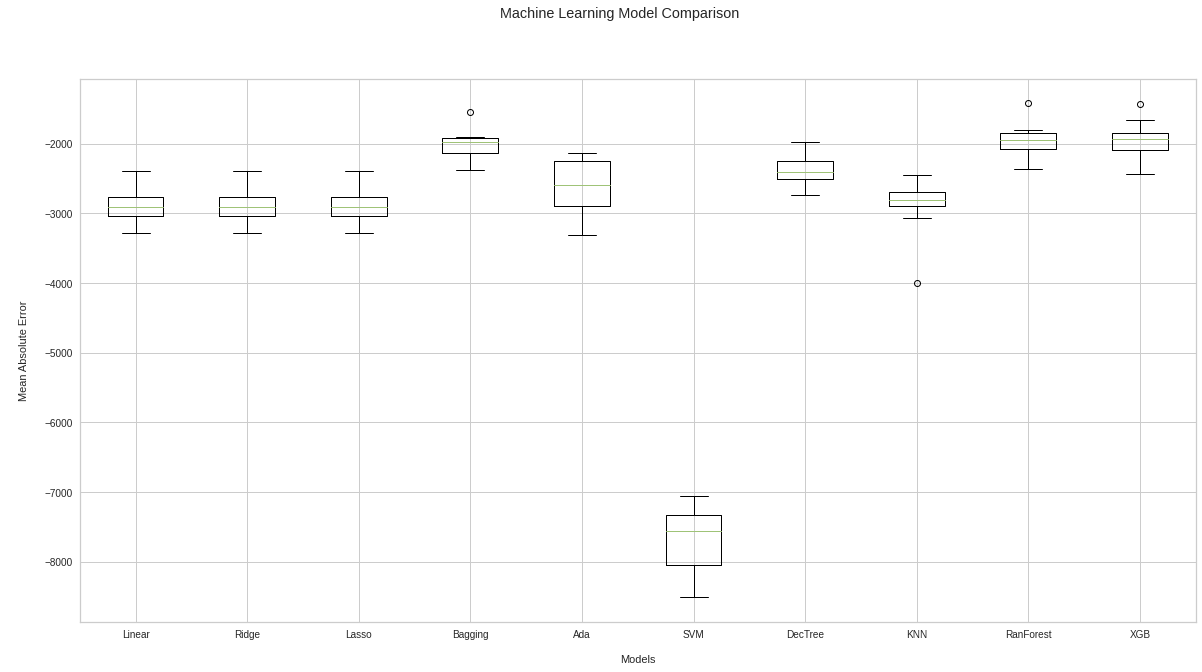

In [107]:
fig = plt.figure()
plt.rcParams["figure.figsize"] = (20,10)
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(mae)
plt.xlabel('\nModels')
plt.ylabel('\nMean Absolute Error\n')
ax.set_xticklabels(model_names)
plt.show()

In [108]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [109]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error', 'mean_absolute_percentage_error', 'mean_squared_logarithmic_error'])
NN_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               768       
                                                                 
 dense_21 (Dense)            (None, 256)               33024     
                                                                 
 dense_22 (Dense)            (None, 256)               65792     
                                                                 
 dense_23 (Dense)            (None, 256)               65792     
                                                                 
 dense_24 (Dense)            (None, 1)                 257       
                                                                 
Total params: 165,633
Trainable params: 165,633
Non-trainable params: 0
_________________________________________________________________


In [110]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [111]:
hist = NN_model.fit(X_train, Y_train, epochs=75, batch_size=32, validation_data = (X_test, Y_test), callbacks=callbacks_list)

Epoch 1/75
16/22 [====================>.........] - ETA: 0s - loss: 0.2467 - mean_absolute_error: 0.2467 - mean_squared_error: 0.1073 - mean_absolute_percentage_error: 295.0234 - mean_squared_logarithmic_error: 0.0568
Epoch 00001: val_loss improved from inf to 4293.09131, saving model to Weights-001--4293.09131.hdf5
22/22 [==============================] - 1s 15ms/step - loss: 0.2239 - mean_absolute_error: 0.2239 - mean_squared_error: 0.0898 - mean_absolute_percentage_error: 202308.7188 - mean_squared_logarithmic_error: 0.0472 - val_loss: 4293.0913 - val_mean_absolute_error: 4293.0913 - val_mean_squared_error: 32543906.0000 - val_mean_absolute_percentage_error: 57.3805 - val_mean_squared_logarithmic_error: 1.0085
Epoch 2/75
17/22 [======================>.......] - ETA: 0s - loss: 0.1090 - mean_absolute_error: 0.1090 - mean_squared_error: 0.0192 - mean_absolute_percentage_error: 118.1063 - mean_squared_logarithmic_error: 0.0099
Epoch 00002: val_loss improved from 4293.09131 to 4104.2192

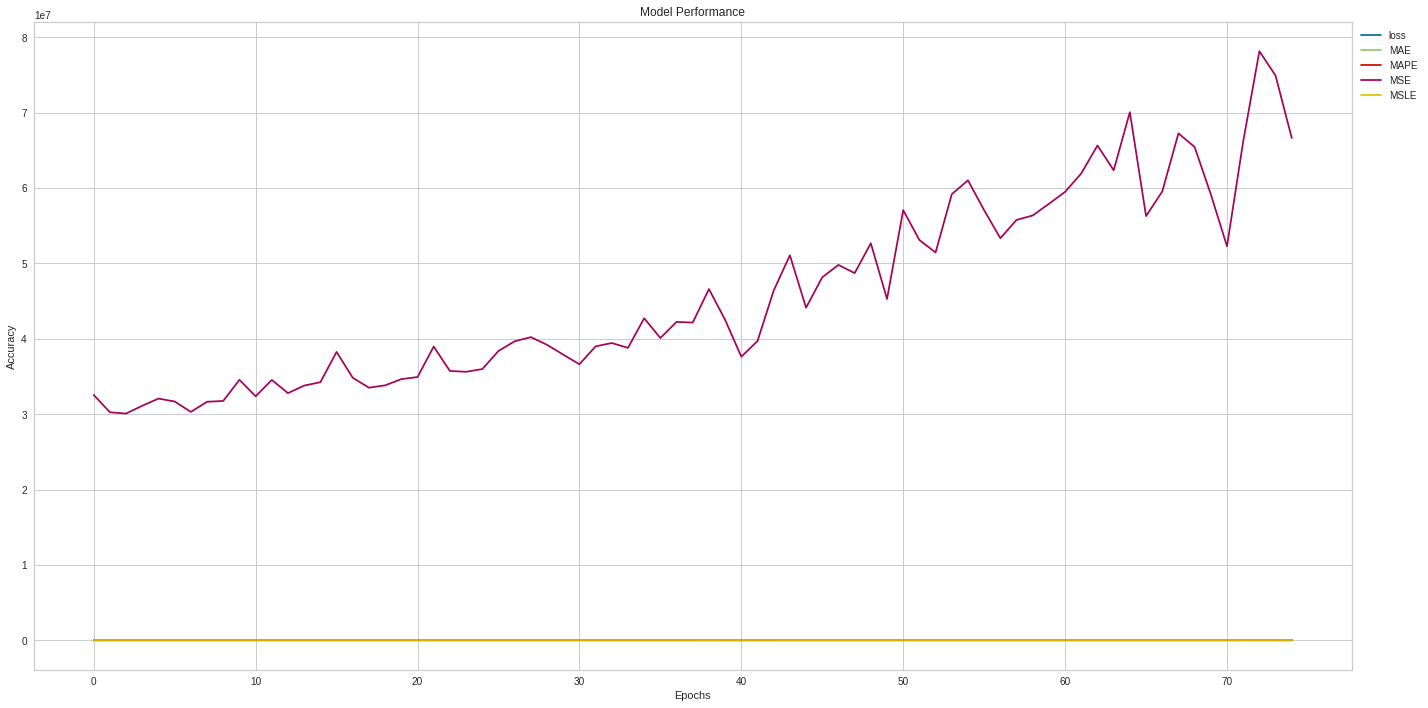

In [112]:
"""plt.plot(hist.history['loss'])
plt.plot(hist.history['mean_absolute_error'])
plt.plot(hist.history['mean_absolute_percentage_error'])
plt.plot(hist.history['mean_squared_error'])
plt.plot(hist.history['mean_squared_logarithmic_error'])"""
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['val_mean_absolute_error'])
plt.plot(hist.history['val_mean_absolute_percentage_error'])
plt.plot(hist.history['val_mean_squared_error'])
plt.plot(hist.history['val_mean_squared_logarithmic_error'])
plt.title('Model Performance')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['loss', 'MAE', 'MAPE', 'MSE', 'MSLE', 'val_loss', 'val_MAE', 'val_MAPE', 'val_MSE', 'val_MSLE'], bbox_to_anchor=(1.0, 1.0), loc='upper left', frameon=False)
plt.tight_layout()
plt.show()

In [114]:
df

,age,gender,miles,debt,income,sales
0,28,0,23,0,4099,620
1,26,0,27,0,2677,1792
2,30,1,58,41576,6215,27754
3,26,1,25,43172,7626,28256
4,20,1,17,6979,8071,4438
...,...,...,...,...,...,...
958,22,0,11,8778,9829,1593
959,19,1,23,4850,3470,4742
960,28,1,28,9312,2720,12771
961,50,0,29,51343,8713,28511


In [115]:
df.drop(['sales'], inplace=True, axis=1)
cluster_df = df

In [120]:
!pip install -q --trusted-host=pypi.org --trusted-host=files.pythonhosted.org --user helper
!pip install -q --trusted-host=pypi.org --trusted-host=files.pythonhosted.org --user opencv-python
!pip install -q --trusted-host=pypi.org --trusted-host=files.pythonhosted.org --user kneed
!pip install -q -U yellowbrick

     |████████████████████████████████| 271 kB 15.1 MB/s 


In [117]:
from sklearn.decomposition import PCA
for comp in range(3, cluster_df.shape[1]):
    pca = PCA(n_components= comp, random_state=42)
    pca.fit(cluster_df)
    comp_check = pca.explained_variance_ratio_
    final_comp = comp
    if comp_check.sum() > 0.85:
        break
        
Final_PCA = PCA(n_components= final_comp,random_state=42)
Final_PCA.fit(cluster_df)
cluster_df=Final_PCA.transform(cluster_df)

num_comps = comp_check.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp,comp_check.sum()))

Using 3 components, we can explain 0.9999996715933644% of the variability in the original data.


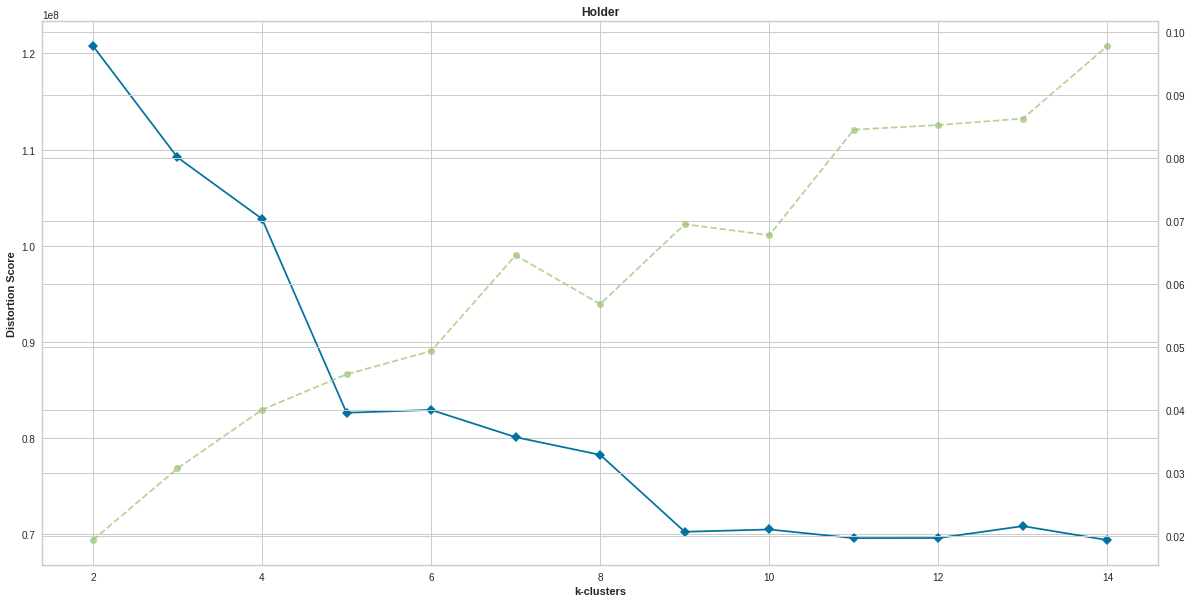

In [125]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
ax = visualizer = KElbowVisualizer(model, k=(2,15), timings=True)

plt.xlabel('k-clusters', weight = 'bold')
plt.ylabel('Distortion Score', weight = 'bold')
plt.title('Holder',fontweight='bold')

visualizer.fit(cluster_df)       
pass;

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7faba6e66e90>,
                 k=None, metric=None, model=None, timings=True)

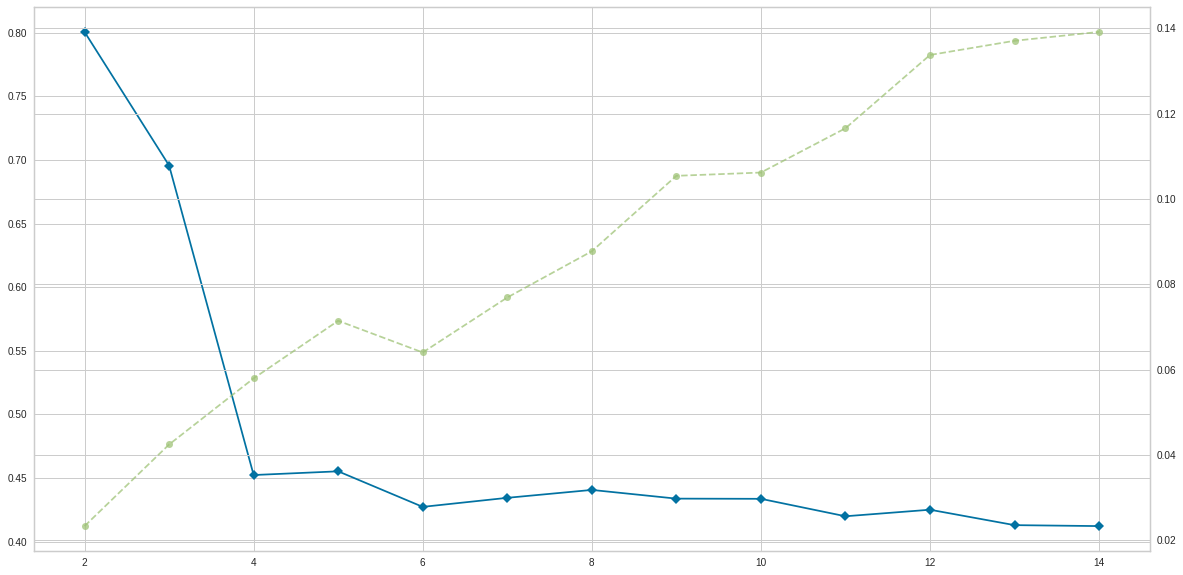

In [129]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state =10)

visualizer = KElbowVisualizer(model, k=(2,15),metric='silhouette', timings= True, locate_elbow=True)
visualizer.fit(cluster_df)             

In [131]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

kmeans_1 = KMeans(n_clusters=5, random_state= 10)

predictions = kmeans_1.fit_predict(cluster_df)

score_kemans_s = silhouette_score(cluster_df, kmeans_1.labels_, metric='euclidean')
score_kemans_c = calinski_harabasz_score(cluster_df, kmeans_1.labels_)
score_kemans_d = davies_bouldin_score(cluster_df, predictions)


print('Silhouette Score: %.4f' % score_kemans_s)
print('Calinski Harabasz Score: %.4f' % score_kemans_c)
print('Davies Bouldin Score: %.4f' % score_kemans_d)

Silhouette Score: 0.4553
Calinski Harabasz Score: 5866.5287
Davies Bouldin Score: 0.7076


InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7faba6c4d2d0>,
                     embedding='mds', legend=True, legend_loc='lower left',
                     legend_size=1.5, max_size=25000, min_size=400, model=None,
                     random_state=None, scoring='membership')

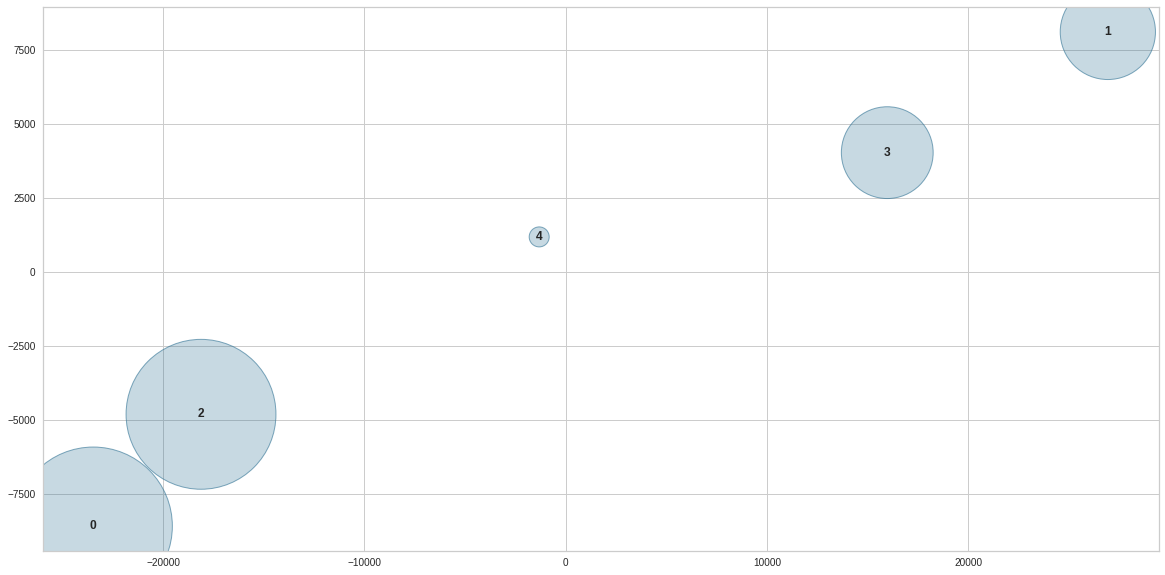

In [133]:
from yellowbrick.cluster import InterclusterDistance


visualizer = InterclusterDistance(kmeans_1)

visualizer.fit(cluster_df)       

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7faba6a78dd0>,
                 k=None, metric=None, model=None, timings=True)

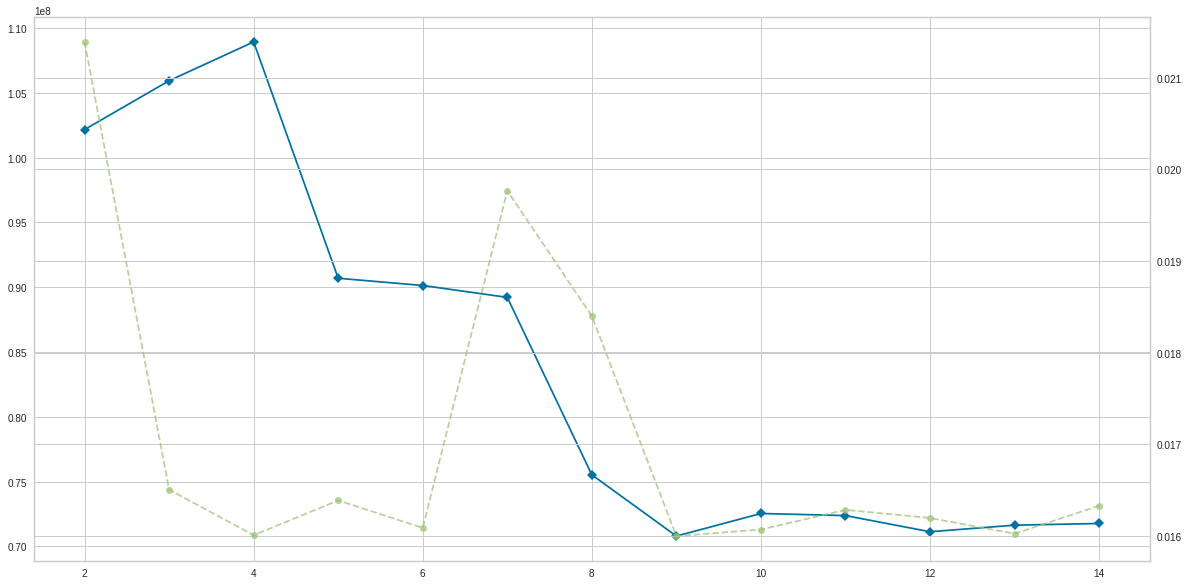

In [135]:
from sklearn.cluster import MiniBatchKMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering()

visualizer = KElbowVisualizer(model, k=(2,15), timings= True)
visualizer.fit(cluster_df)       

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7faba69526d0>,
                 k=None, metric=None, model=None, timings=True)

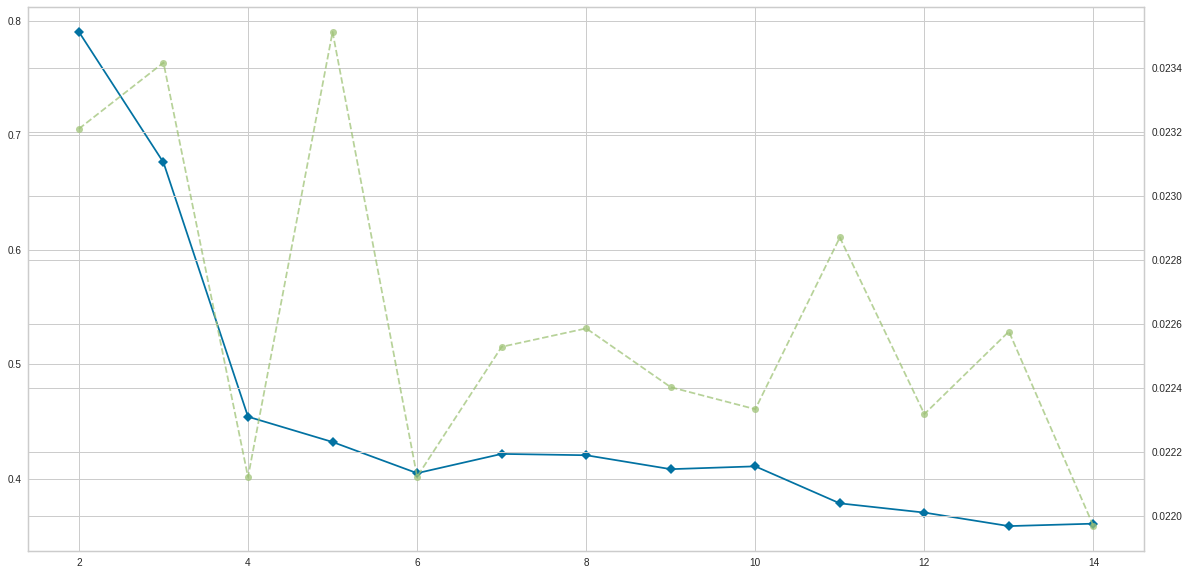

In [137]:
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,15),metric='silhouette', timings= True, locate_elbow=False)
visualizer.fit(cluster_df)        

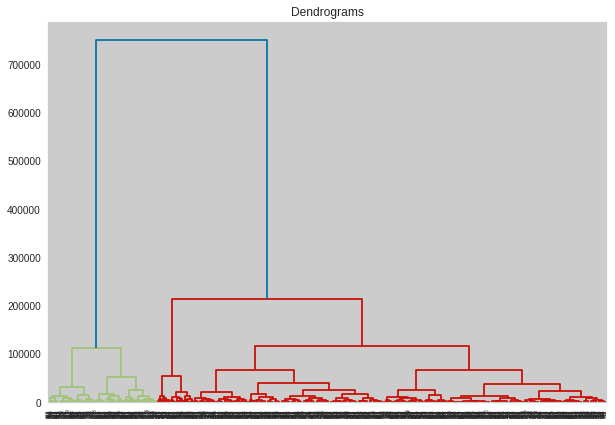

In [138]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(cluster_df, method='ward'))

In [139]:
from numpy import unique
from numpy import where
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot

model = AgglomerativeClustering(n_clusters=4)
yhat = model.fit(cluster_df)
yhat_2 = model.fit_predict(cluster_df)

clusters = unique(yhat)

score_AGclustering_s = silhouette_score(cluster_df, yhat.labels_, metric='euclidean')
score_AGclustering_c = calinski_harabasz_score(cluster_df, yhat.labels_)
score_AGclustering_d = davies_bouldin_score(cluster_df, yhat_2)

print('Silhouette Score: %.4f' % score_AGclustering_s)
print('Calinski Harabasz Score: %.4f' % score_AGclustering_c)
print('Davies Bouldin Score: %.4f' % score_AGclustering_d)

Silhouette Score: 0.4542
Calinski Harabasz Score: 4915.6321
Davies Bouldin Score: 0.7428


In [165]:
import kneed
dir(kneed)

['__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__']